# Importing libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Importing data

In [5]:
# Import the data file
path=r'C:\Users\asicz\OneDrive\Dokumenty\CareerFoundry_Data_Analyst_Course\Data Immersion\Achievement 6'
evo_data=pd.read_csv(os.path.join(path, 'corrected_evo_data.csv'), index_col = False)

In [6]:
matplotlib.__version__

'3.8.4'

In [7]:
%matplotlib inline

# Data profiling
#### Once again, a summary of the data, similar to the previous initial exploration, presented in a more consize, report-like manner.
#### Already include some of the interactions we would like to explore.

In [13]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [14]:
import ydata_profiling

In [15]:
# Profiling
profile = evo_data.profile_report(title="Hominin evolution dataset report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
# Save the report
profile.to_file("evo_report.json")

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation

#### Investigating the correlations in the evolutionary data set. 
#### The only numerical values that we can perform this analysis on are: Cranial Capacity, Time and Height.

In [18]:
# Select the numerical data for correlation matrix
numerical_data = evo_data.select_dtypes(include=['number'])

                      Time  Cranial_Capacity    Height
Time              1.000000         -0.662638 -0.594751
Cranial_Capacity -0.662638          1.000000  0.845925
Height           -0.594751          0.845925  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

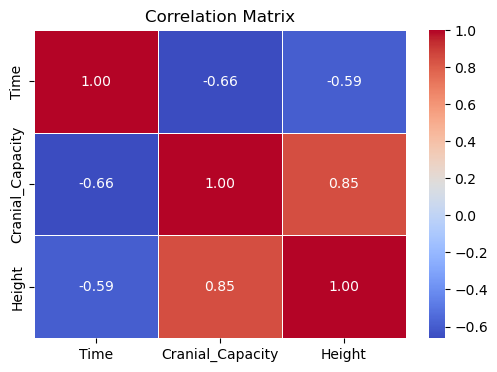

In [21]:
# Create a correlation matrix 
corr_matrix = numerical_data.corr()
print(corr_matrix)

# Plot the heatmap with Pearson correlation coefficient
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix")

#### Time in our data set is presented as mln years ago, the higher the number in Time column, the more in the past it is. Therefore, we can interpret this negative correlation with Cranial Capacity as the more distant in the past the species was, the smaller its Cranial Capacity was.
#### Height has a strong positive correlation with Cranial Capacity, meaning that taller species had bigger brains.

# Scatter plots

#### Since both correlations look strong, we will plot scatter plots of Cranial Capacity & Time and Cranial Capacity & Height

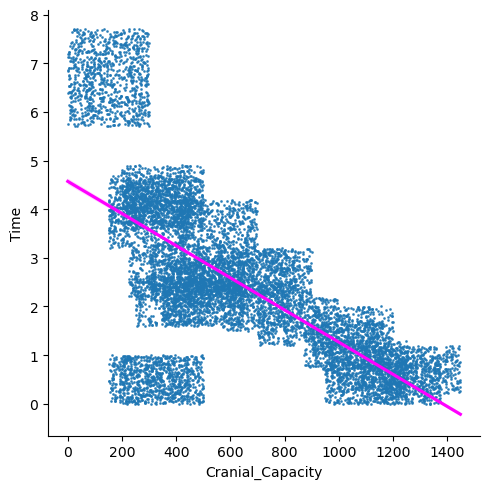

In [23]:
# Create a scatterplot for the Cranial Capacity and Time
sns.lmplot(x='Cranial_Capacity', y='Time', data=numerical_data, 
           scatter_kws={'s': 1}, 
           line_kws={'color': 'magenta'})

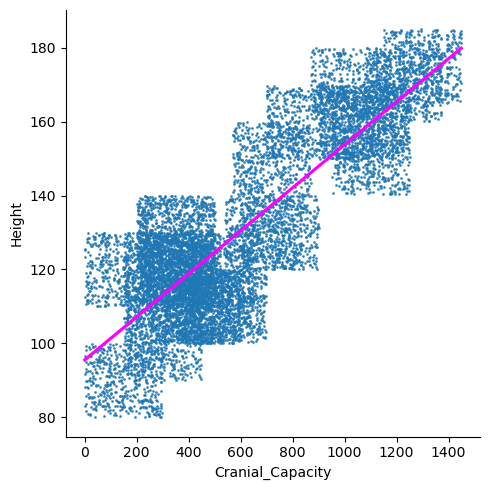

In [25]:
# Create a scatterplot for the Cranial Capacity and Time
sns.lmplot(x='Cranial_Capacity', y='Height', data=numerical_data, 
           scatter_kws={'s': 1}, 
           line_kws={'color': 'magenta'})

#### We see the most of the Time and Cranial Capacity data points are scattered along the trend line, with exeption of two patches. We can infer that these could be two distinct species, one very far away from us, and the other in quite recent past, and both of them show quite low Cranial Capacity. We have to pay a special attention to those later.
#### Height and Cranial Capacity correlate clearly in a linear way.

# Pair plots

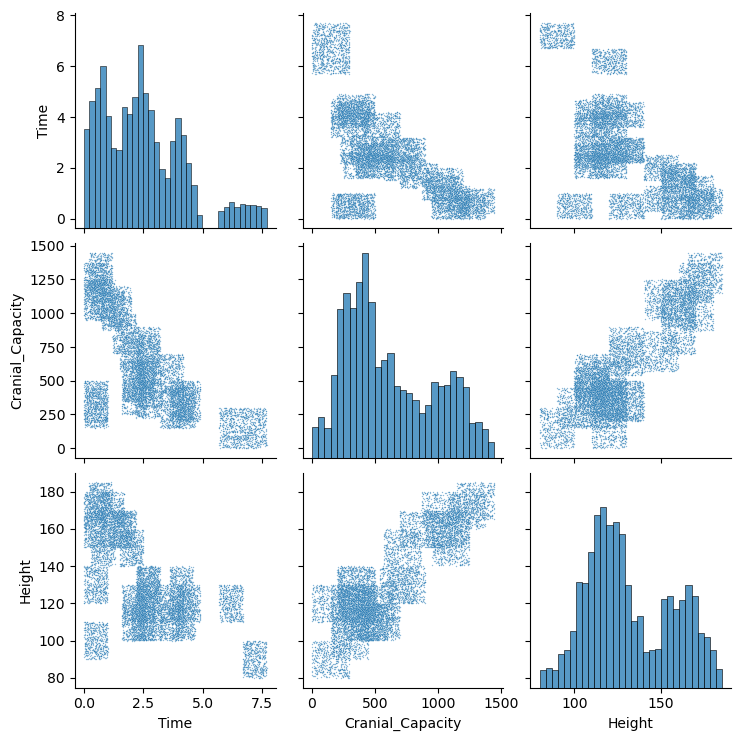

In [86]:
# Create a pair plot 
pp = sns.pairplot(numerical_data, plot_kws={'s': 1, 'alpha': 0.5})

#### Looking at the distribution of Cranial Capacity and Height variables, we see that 1) they are similar, which again shows that they can be correlated, 2) they have two peaks, which can split the data naturally into the short distribution and tall distribution for Height and small brain distribution and big brain distribution. We may further investigate this.
#### The Time can also be categorized as distant and closer hominins, but I would not do it yet at this point. Maybe later based on the analysis. We cannot focus on the Time data distribution as it highly depends on number of samples gathered. The more distant the past, the less likely it is to find a preserved specimen.

# Categorical plots for numerical data

<Axes: xlabel='Height', ylabel='Count'>

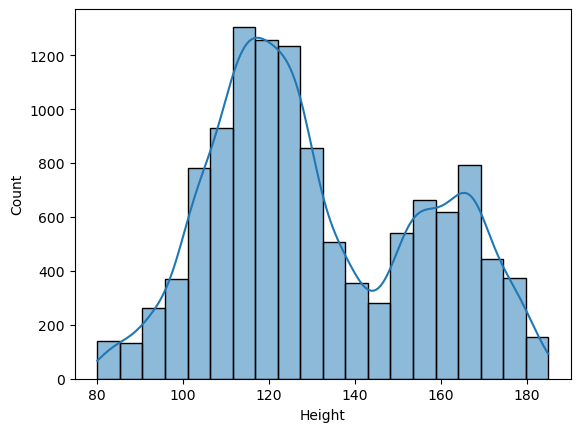

In [117]:
# Plotting histogram for Height
sns.histplot(numerical_data['Height'], bins = 20, kde = True)

In [27]:
# Define Height categories
numerical_data.loc[numerical_data['Height'] < 140, 'Hominin height'] = 'Short'
numerical_data.loc[numerical_data['Height'] > 140, 'Hominin height'] = 'Tall'

In [123]:
numerical_data['Hominin height'].value_counts(dropna = False)

Hominin height
Short    8000
Tall     4000
Name: count, dtype: int64

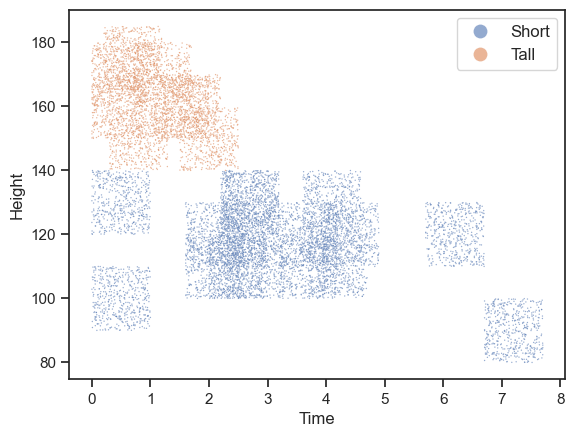

In [42]:
# Create a categorical plot for Height and Time
sns.set(style="ticks")
cp1 = sns.scatterplot(x="Time", y="Height", hue="Hominin height", data=numerical_data, alpha=0.6, s=1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, markerscale=10, fontsize=12)

In [44]:
cp1.get_figure().savefig("height_cat_over_time.png")

<Axes: xlabel='Cranial_Capacity', ylabel='Count'>

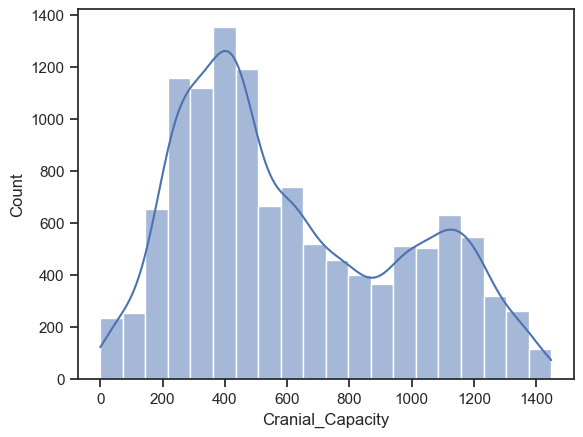

In [69]:
# Plotting histogram for Cranial Capacity
sns.histplot(numerical_data['Cranial_Capacity'], bins = 20, kde = True)

In [71]:
# Define Cranial Capacity categories
numerical_data.loc[numerical_data['Cranial_Capacity'] < 850, 'Brain size'] = 'Small'
numerical_data.loc[numerical_data['Cranial_Capacity'] > 850, 'Brain size'] = 'Big'

In [73]:
numerical_data['Brain size'].value_counts(dropna = False)

Brain size
Small    8659
Big      3341
Name: count, dtype: int64

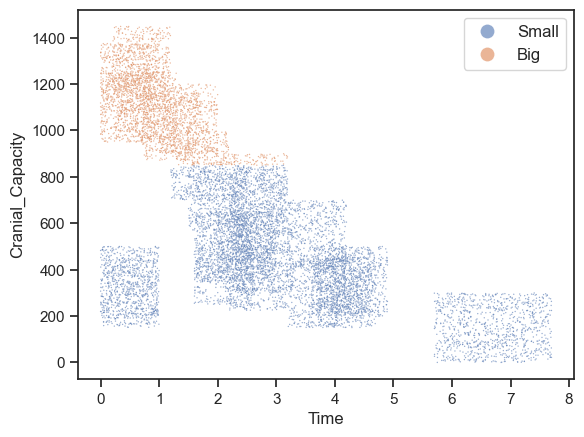

In [75]:
# Create a categorical plot for Cranial Capacity and Time
sns.set(style="ticks")
cp2 = sns.scatterplot(x="Time", y="Cranial_Capacity", hue="Brain size", data=numerical_data, alpha=0.6, s=1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, markerscale=10, fontsize=12)

In [77]:
cp2.get_figure().savefig("cranial_capacity_cat_over_time.png") 

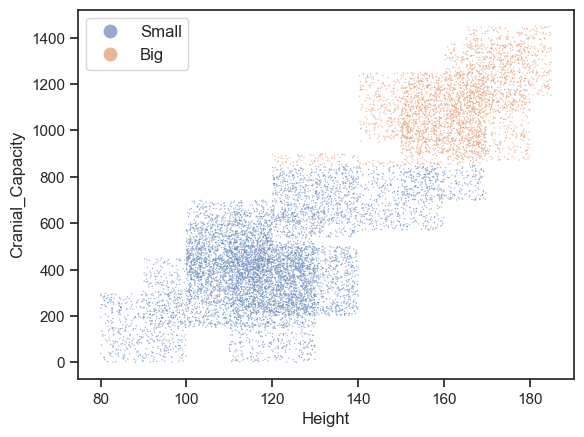

In [81]:
# Create a categorical plot for Cranial Capacity and Height
sns.set(style="ticks")
cp3 = sns.scatterplot(x="Height", y="Cranial_Capacity", hue="Brain size", data=numerical_data, alpha=0.6, s=1)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, markerscale=10, fontsize=12)

In [83]:
cp3.get_figure().savefig("cranial_capacity_cat_over_hight.png") 

#### We see that the tall hominins with big brains appeared recently in our evolution. There is though an outgroup of recently evolved short hominins and an outgroup of recently evolved hominins with small brains.
#### Additionally, we see again that the taller the hominin species, the bigger the brain size.
#### This observation is already answering the first question of this project, whether there is a trend over evolutionary time in the brain size. So we clearly see that the trend is increasing brain size over time (with one exception). We also tackled partially question number 4, as we showed that the hominin Height correlates positively with the brain size.
#### In the future analyses we will need to further explore the outliers in the Time-Height and Time-Cranial_Capacity relationships.

# Categorical data
#### Most of the variables in the evolutionary data set are categorical. We will explore them and in the future analysis we may need to transform some categorical variables into numerical representations. This is essentially the same as in the initial exploration performed in the last Exercise. 

In [90]:
# Print the categorical variables
categorical_columns = evo_data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Genus_&_Species', 'Location', 'Zone', 'Current_Country', 'Habitat',
       'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
       'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape',
       'Tooth_Enamel', 'Technology', 'Technology_type', 'Bipedalism', 'Arms',
       'Feet', 'Diet', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy',
       'Migrated', 'Skeleton'],
      dtype='object')


C:\Users\asicz\AppData\Local\Temp\ipykernel_12060\2954645372.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))  # Set figure size


<Figure size 1200x3700 with 0 Axes>

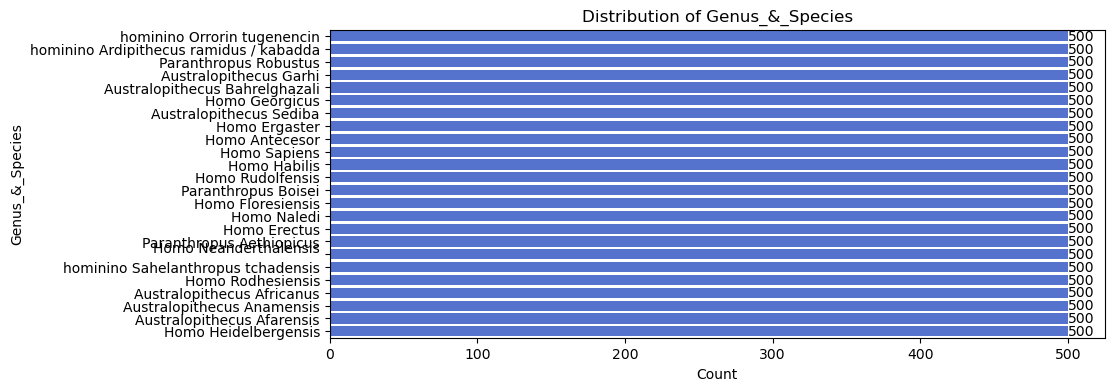

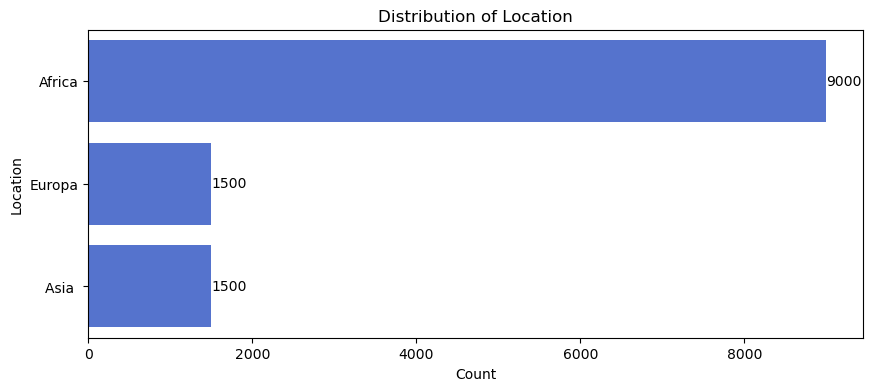

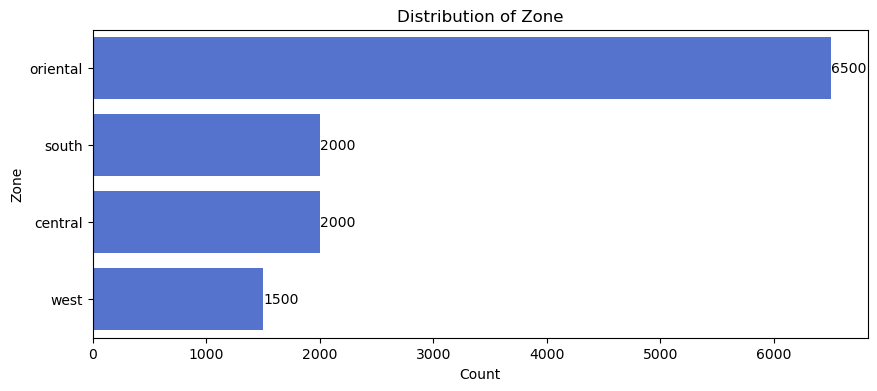

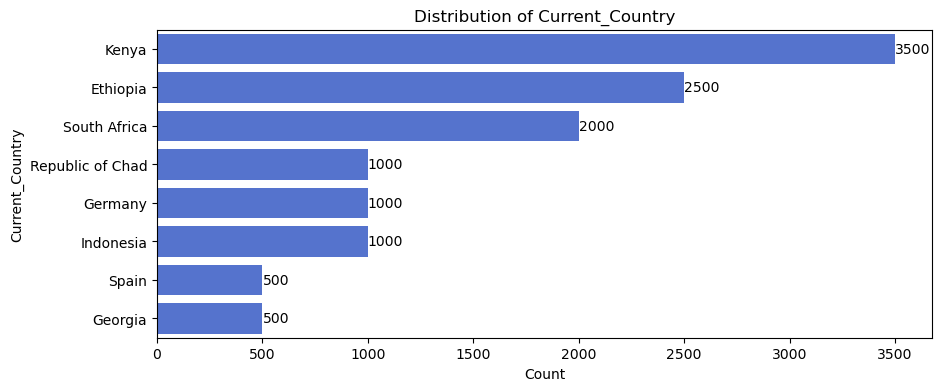

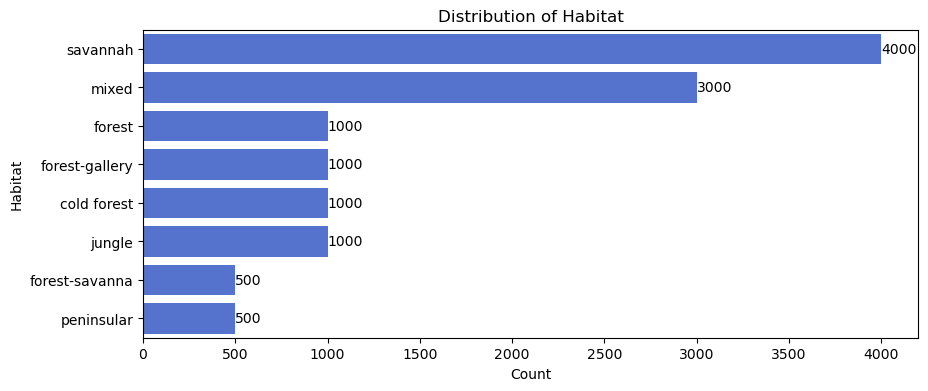

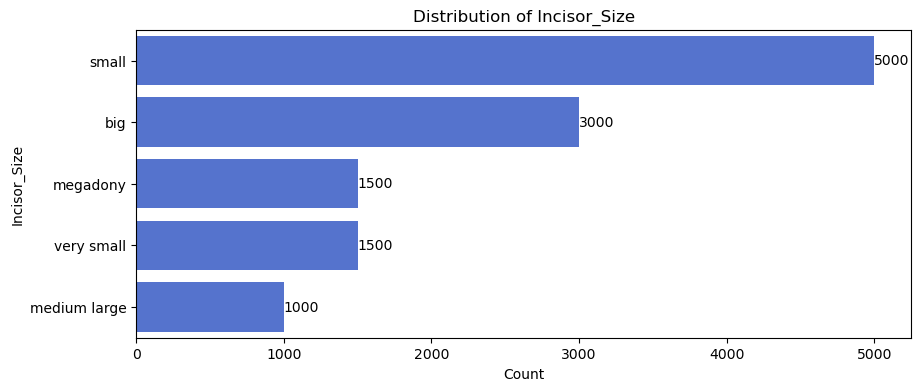

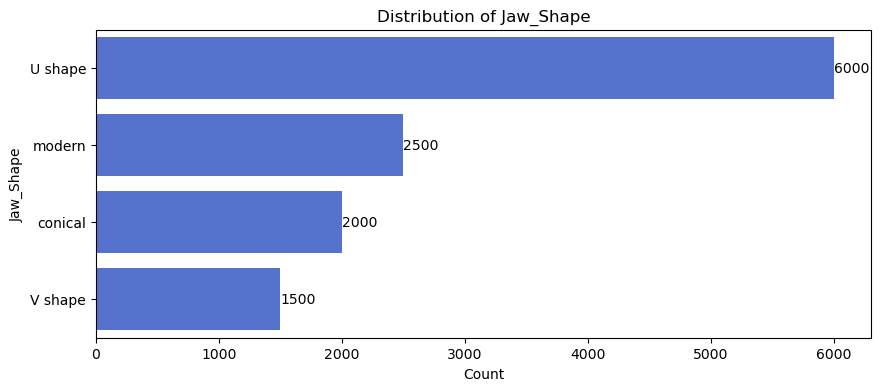

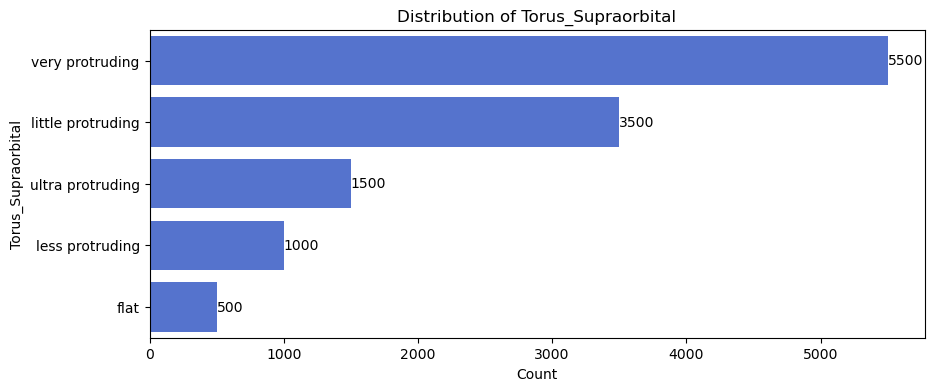

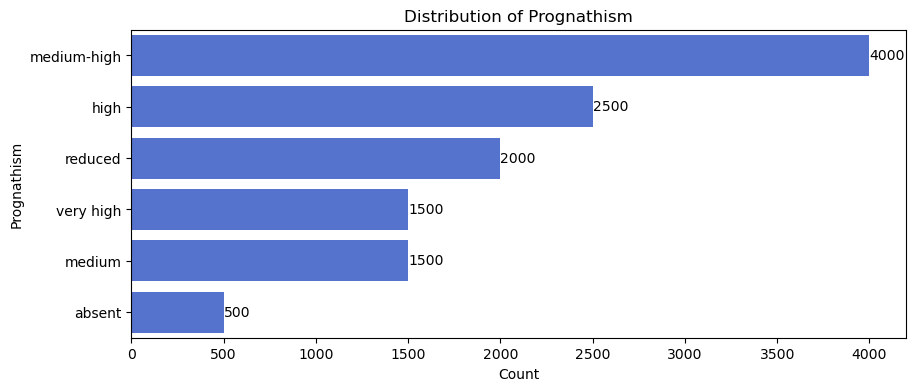

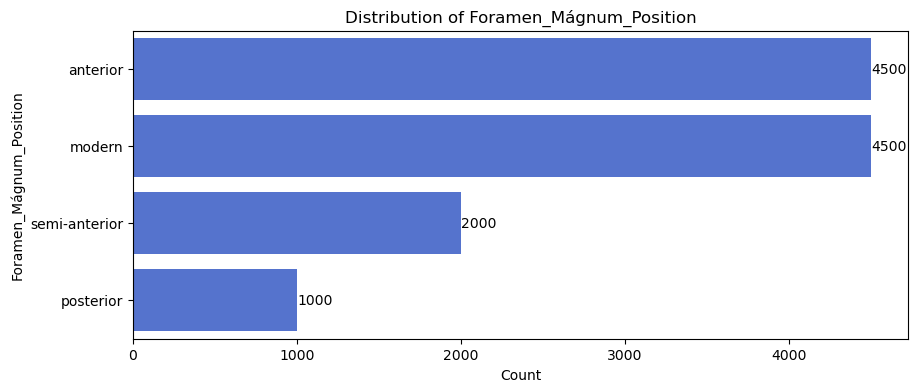

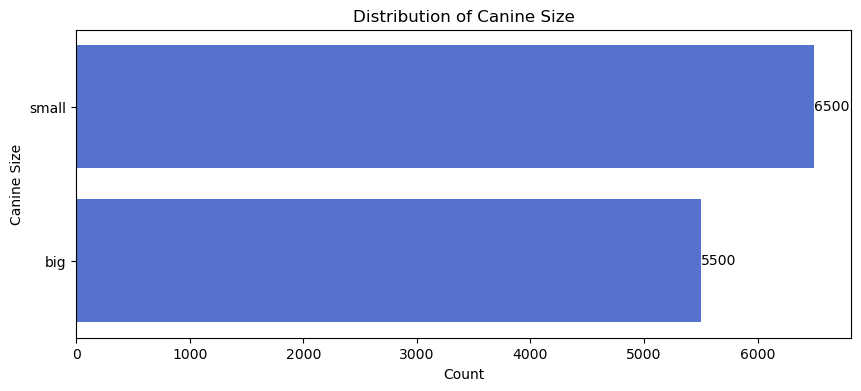

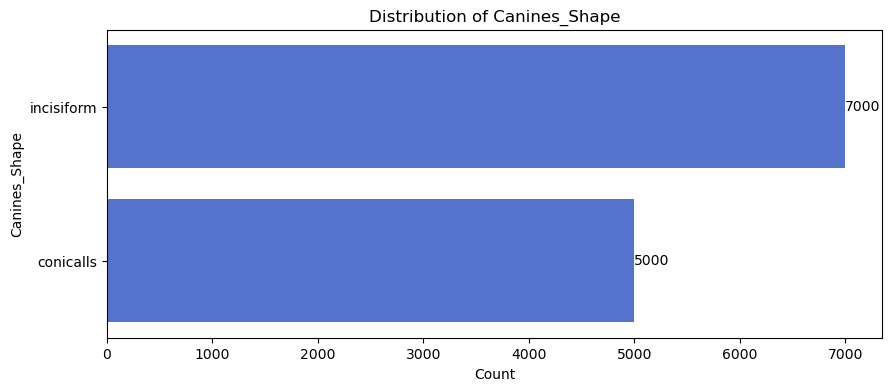

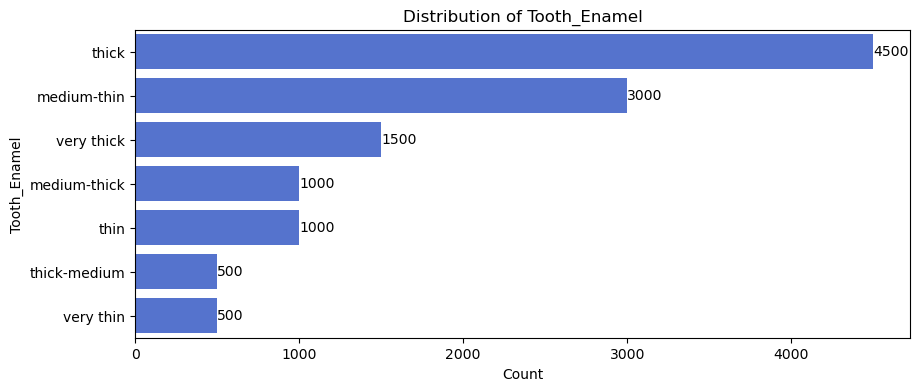

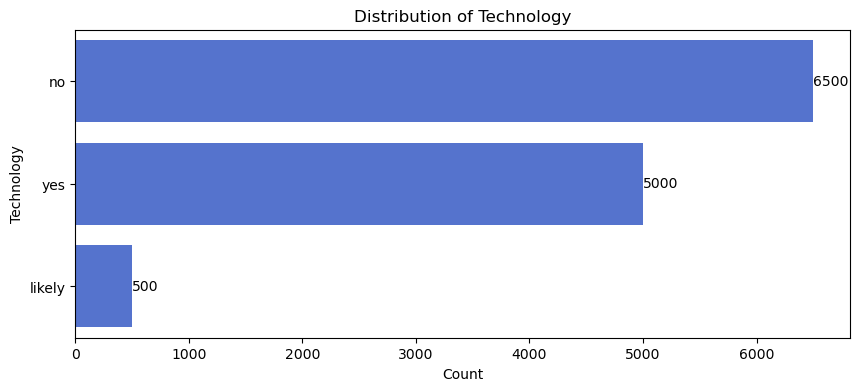

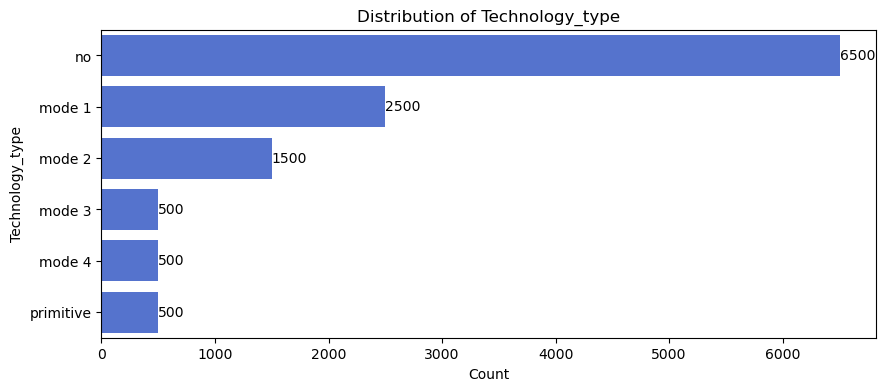

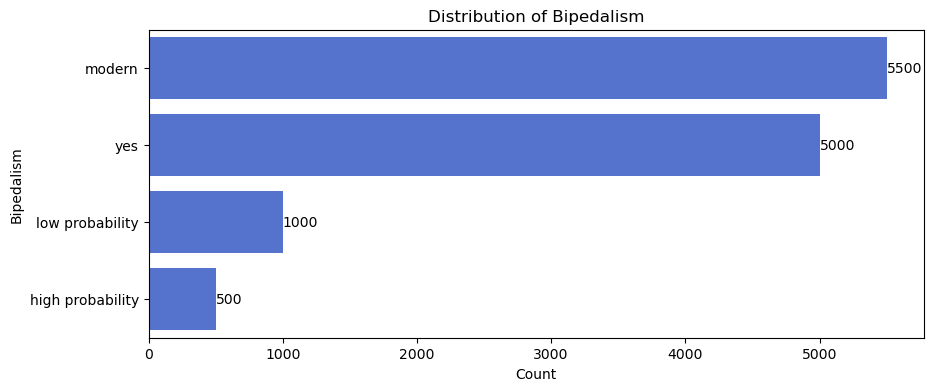

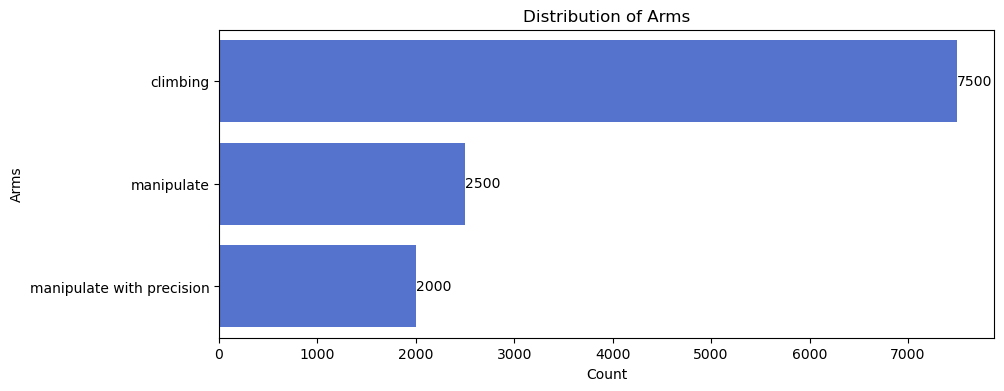

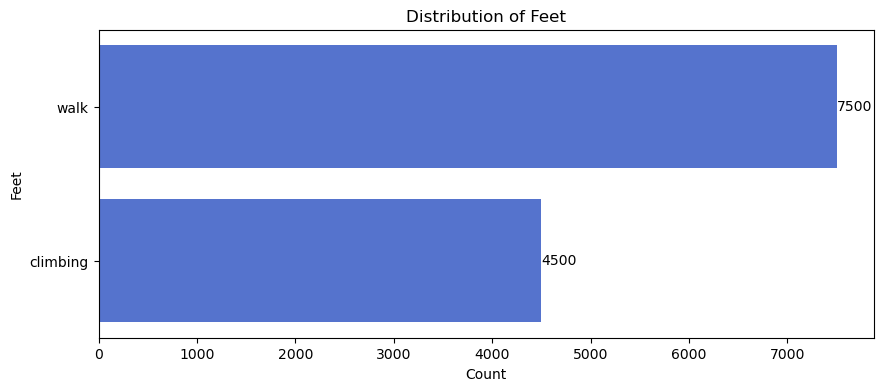

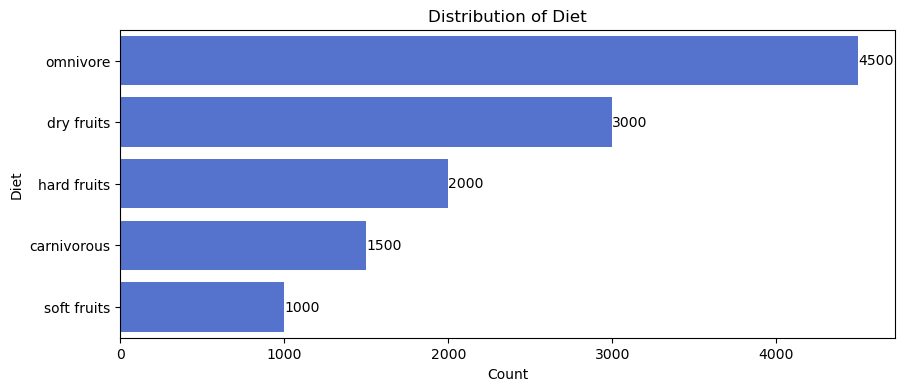

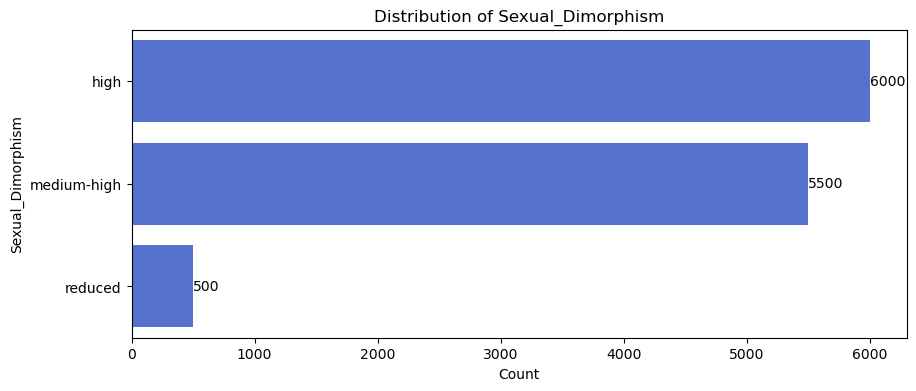

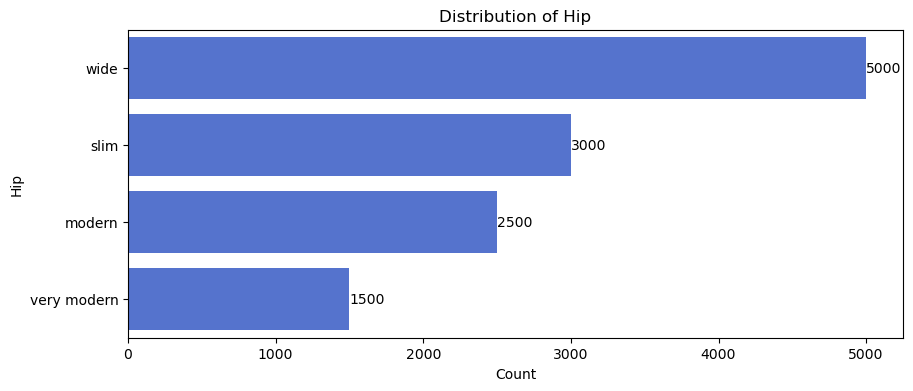

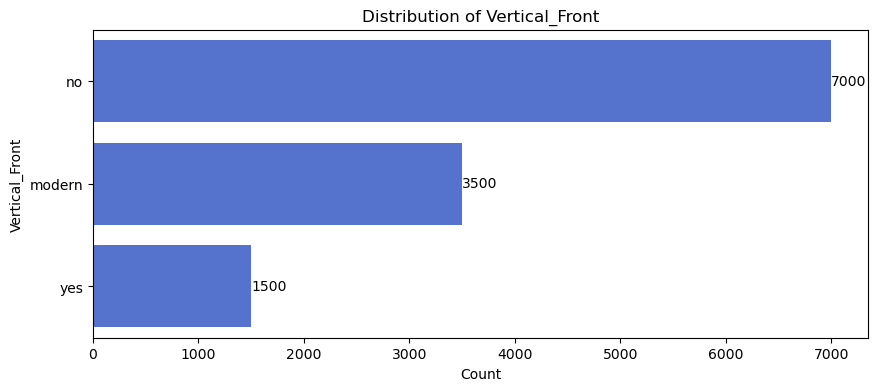

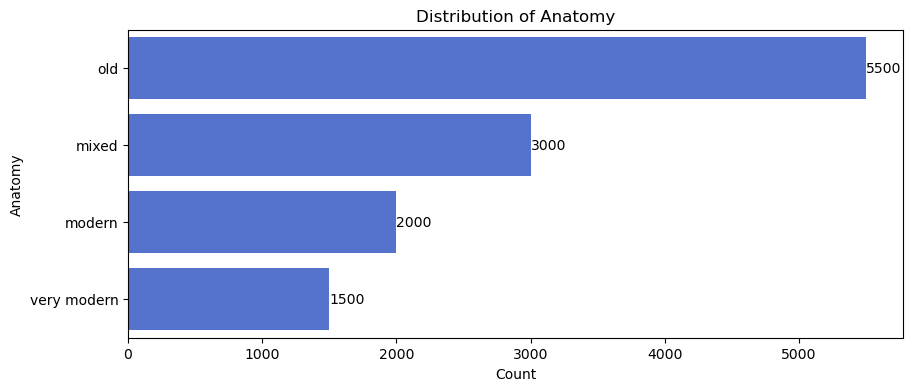

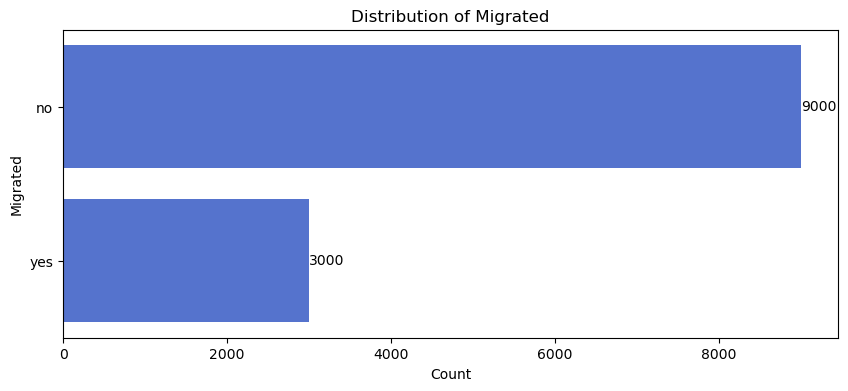

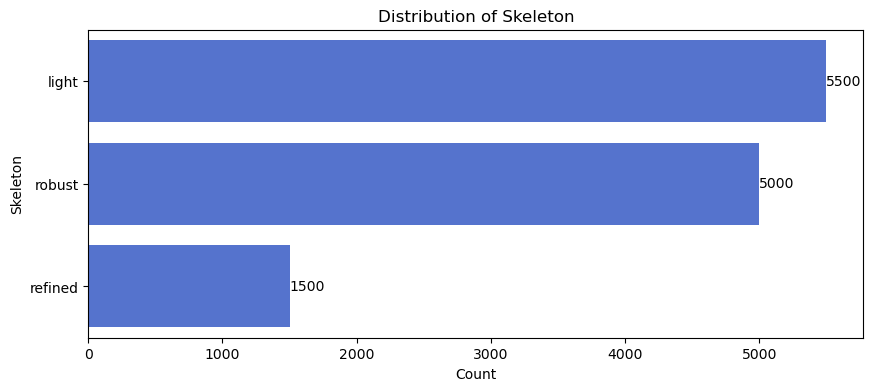

In [94]:
# Create a histogram-like visualization for categorical variables
plt.figure(figsize=(12, 6 * len(categorical_columns) // 4))

# Loop through categorical columns and create countplots
for col in categorical_columns:
    plt.figure(figsize=(10, 4))  # Set figure size
    ax = sns.countplot(data=evo_data, y=col, order=evo_data[col].value_counts().index, color="royalblue")  
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

    # Display values on bars for better readability
    for container in ax.containers:
        ax.bar_label(container, fmt="%d")

# Categorical data vs Cranial Capacity over Time

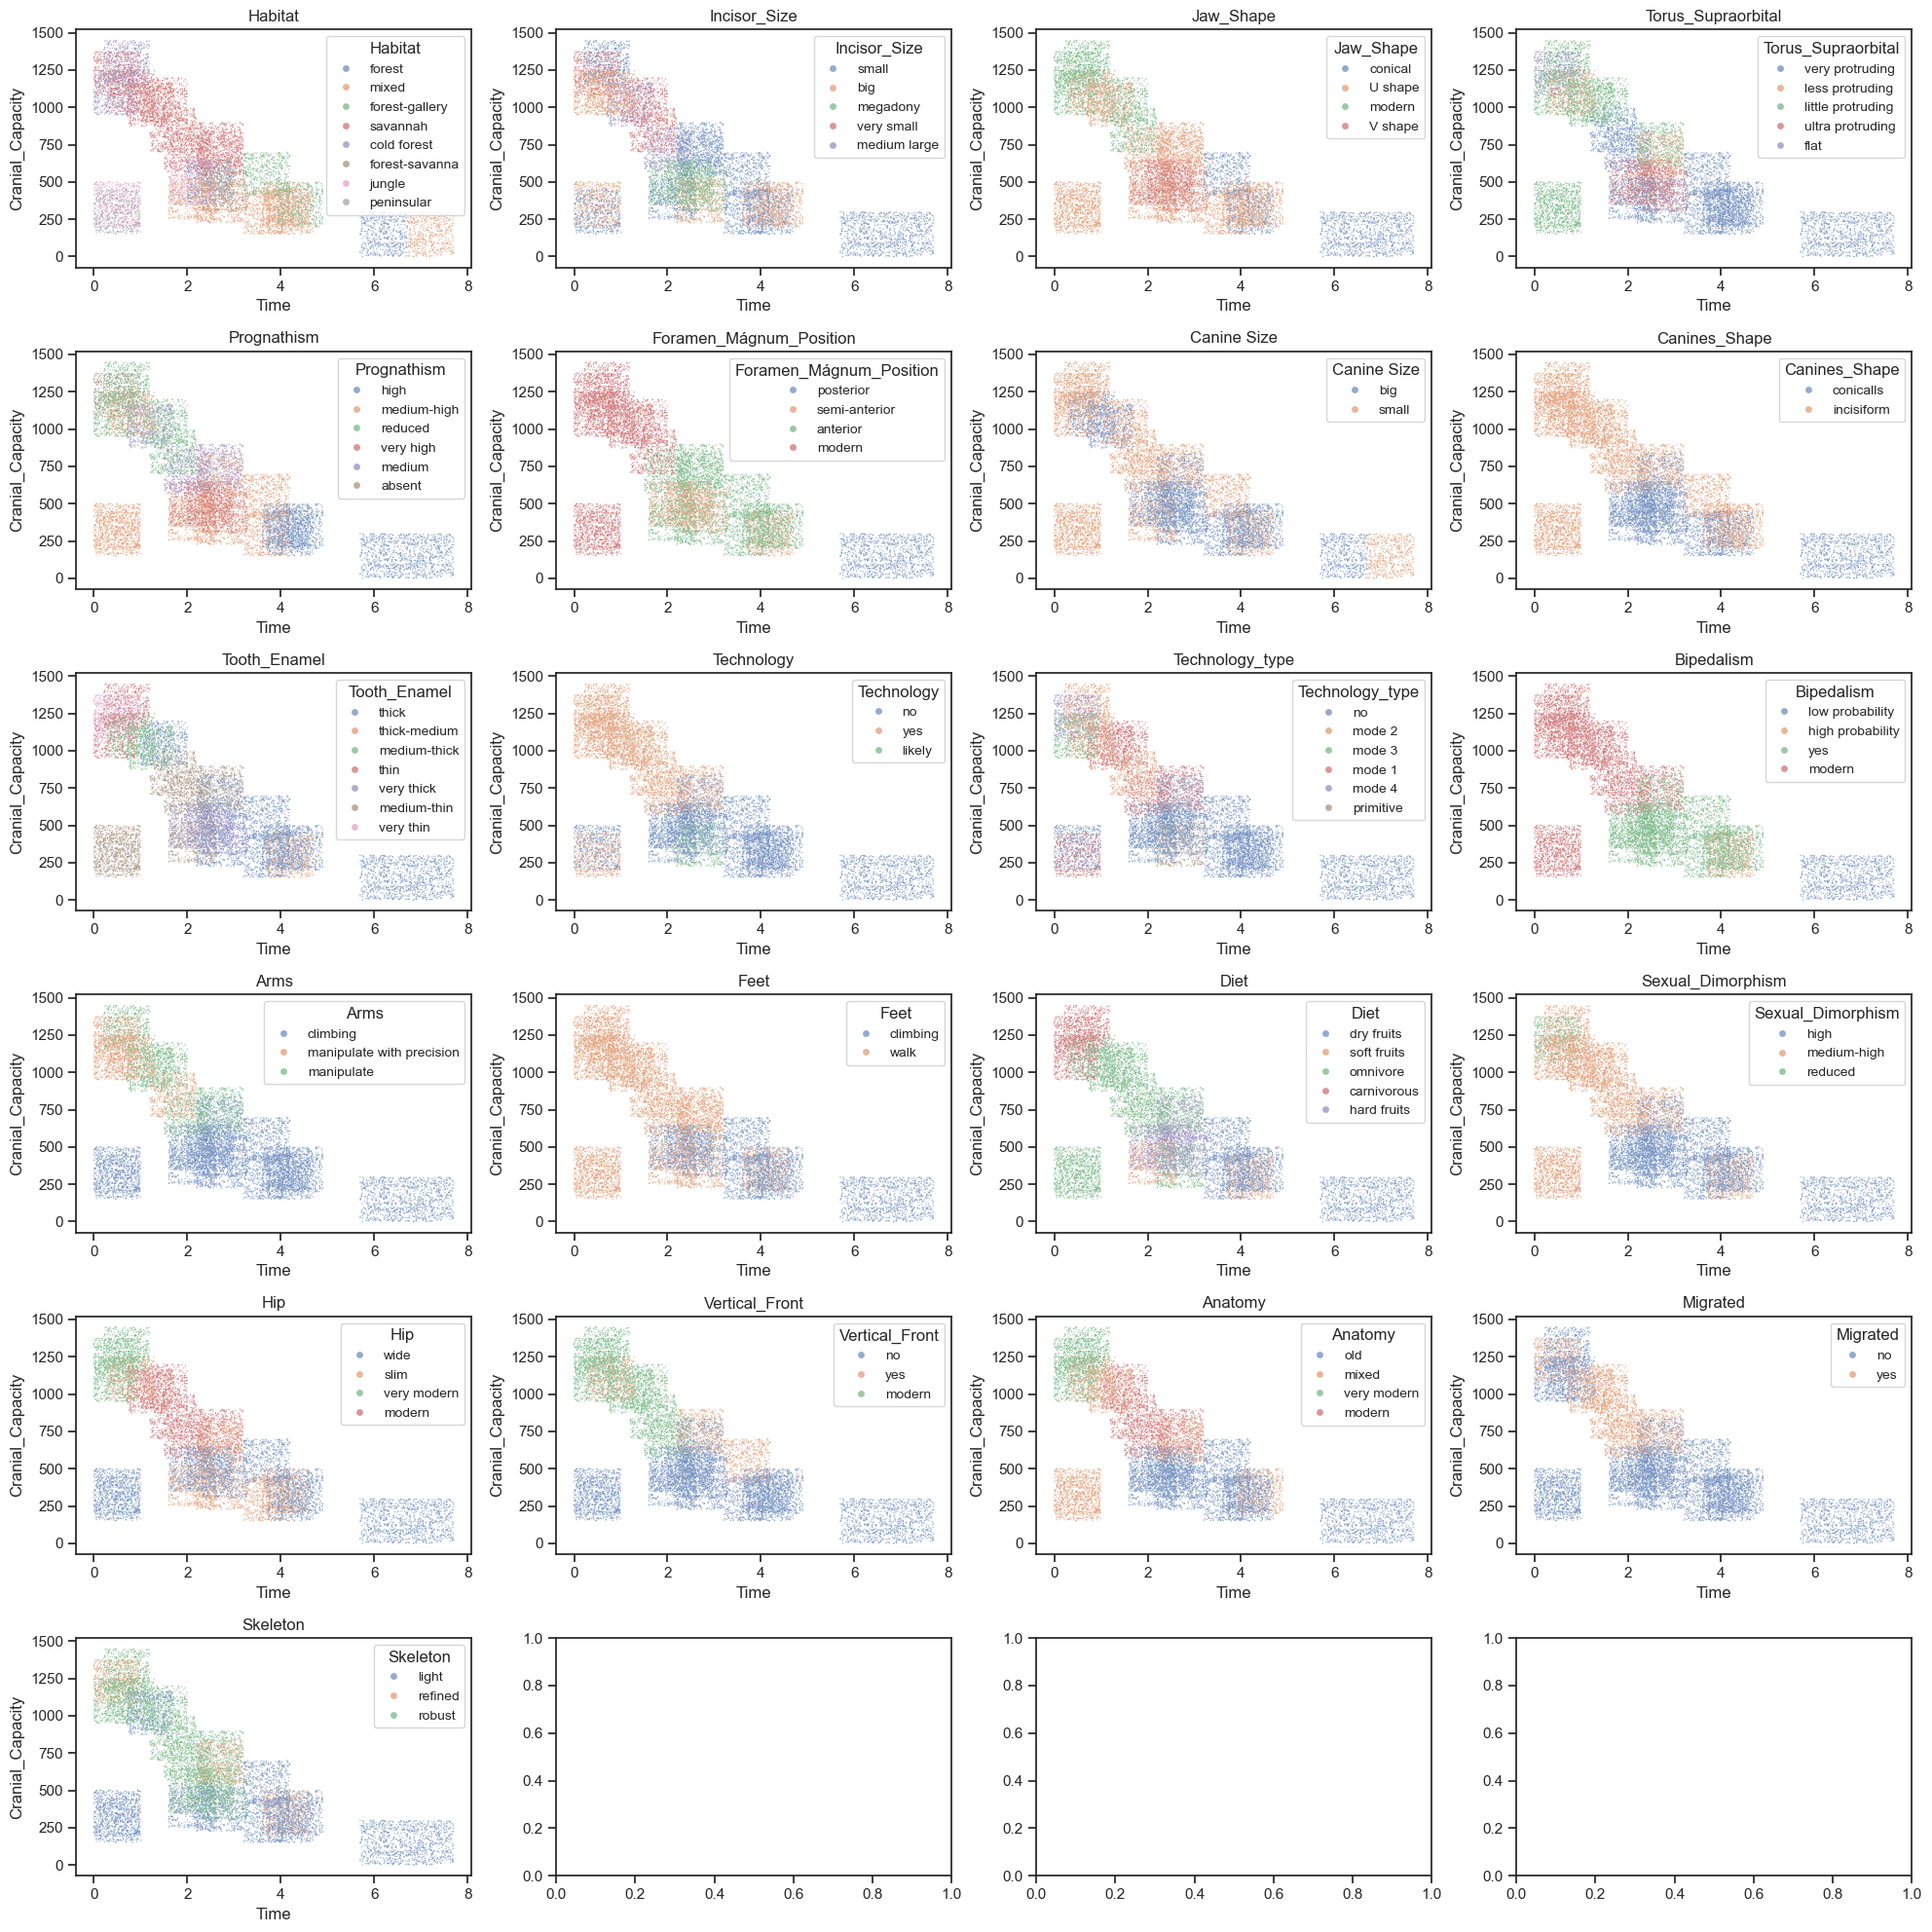

In [107]:
# Analysis of categorical variables (excluding homininspecies and geographical data for now) imposed over Cranial_Capacity over Time relationship
categorical_vars = [
    'Habitat',
    'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
    'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape',
    'Tooth_Enamel', 'Technology', 'Technology_type', 'Bipedalism', 'Arms',
    'Feet', 'Diet', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy',
    'Migrated', 'Skeleton'
]
sns.set(style="ticks")

# Create subplots in a grid 
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))  
axes = axes.flatten()

for i, cat_var in enumerate(categorical_vars):
    if cat_var in evo_data.columns:
        ax = axes[i]

        # Ensure 'hue' is categorical
        evo_data[cat_var] = evo_data[cat_var].astype(str)
        
        # Create scatter plot
        scatter = sns.scatterplot(
            x="Time", 
            y="Cranial_Capacity", 
            hue=cat_var,  # Hue as the categorical variable
            data=evo_data, 
            alpha=0.6, 
            s=1,  
            ax=ax
        )
        
        ax.set_title(cat_var)

        # Get legend handles and labels
        handles, labels = ax.get_legend_handles_labels()

        # Remove duplicate legend from plot
        ax.legend_.remove()

        # Add a new legend with bigger markers
        ax.legend(handles=handles, labels=labels, title=cat_var, markerscale=5, fontsize=10)

plt.tight_layout()

#### Now we have a big overview of the categorical data in the context of Cranial Capacity (so the brain size) over the evolutionary timeline.
#### To analyze them deeper, we need to use other tools like principal component analysis or classifiers.
#### We can already see some mapping/grouping in features like Feet biology, Migration or Diet.